# Polynomials

## Importance of polynomials in science

They are prevalent in all fields - ranging from physics to economics.

**Examples**:
- chemistry: model potential energy surfaces
- astronomy: model object (stars, planets, astroids) trajectories, velocities, interactions 
- economics: model forcast money trends
- meteorology: model weather patterns
- engineering: create rollar coaster design
- virology: predict contagons growth
- statistics: regressions and interpolation

Often in the real world we can almost never evaluate functions exactly because they become **too complicated**. Instead we evaluate functions **using approximations created using polynomials** (e.g. Taylor series expansions: https://en.wikipedia.org/wiki/Taylor_series).

---

## Polynomials Defintion and Components

Example (2$^{nd}$-degree polynomial): $3x^2 + 2x + 1$

where the overall polynomial degree is defined by the highest power value (i.e. $x^2$: 2$^{nd}$-degree), and the coefficients are [3, 2, 1].

- https://en.wikipedia.org/wiki/Polynomial


## Example of simple polynomials using Numpy functions

#### Creating one-dimensional polynomials to various degrees: 

`poly1d`: https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

---
Okay, let's revisit the idea of polynomials, and slowly build up our understanding together.

In [39]:
import matplotlib.pyplot as plt
import numpy as np

- Create a one dimensional (i.e. has one variable...x) polynomials using a function
    - using different coefficient(s)
    - evaluate the resulting function using a variable (i.e. x) value of 2.

To do this **concisely** and to **reduce error**, let's create a user-defined function that

a) generates a polynomial using provided coefficients,

b) prints out the polynomial equation and

c) its value when evaluate it x=2:

In [59]:
def my_poly1d(coeff: int=None):
    
    polynomial = np.poly1d(coeff)
    
    print('Polynomial: \n{0}\n'.format(polynomial))
    
    print('Value when x=2: {0}'.format(polynomial(2)))

#### One coefficient (not very exciting): [M] --> $M$

In [60]:
coefficients = [3]
my_poly1d(coefficients)

Polynomial: 
 
3

Value when x=2: 3


Notice that the polynomial generated does not have an 'x' term...the equation is just a constant.

That means the y-values of the "polynomial" equation "3" is 3 for all x-values:

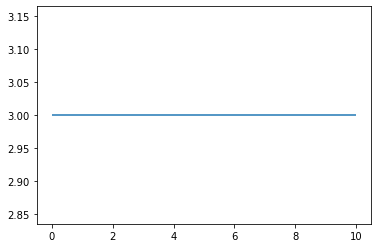

In [54]:
plt.plot()
plt.hlines(xmin=0, xmax=10, y=3)
plt.show()

#### Two coefficients: [M, N] --> $Mx + N$
- Note how the M shifts to the x

In [55]:
coefficients = [1, 2]
my_poly1d(coefficients)

Polynomial: 
 
1 x + 2

Value when x=2: 4


##### Including a negative coefficients: [1, -1]

In [56]:
coefficients = [1, -1]
my_poly1d(coefficients)

Polynomial: 
 
1 x - 1

Value when x=2: 1


#### Three coefficients: [M, N, O] --> $Mx^2 + Nx + O$

In [57]:
# coefficients = [x^2, x, constant]
coefficients = [-4, 1, -2]
my_poly1d(coefficients)

Polynomial: 
    2
-4 x + 1 x - 2

Value when x=2: -16


#### Four coefficients: [M, N, O, P] --> $Mx^3 + Nx^2 + Ox + P$

In [58]:
coefficients = [5, -4, 1, -1]
my_poly1d(coefficients)

Polynomial: 
   3     2
5 x - 4 x + 1 x - 1

Value when x=2: 25


#### Access the Polynomial's Coefficients

In [31]:
polynomial = np.poly1d(coefficients)

polynomial.coefficients

[-1.04595921  1.69627957  3.41269291  2.79322153]


#### Access the Polynomial's Order

In [32]:
polynomial.order

3

## Math with polynomials

#### Square of a polynomial

The square of a polynomial
$(a + b)^2 = (a + b)(a + b) = a^2 + 2ab + b^2$

**Example**:

`np.poly1d([2, 1])` $\rightarrow 2x + 1$

$(2x + 1)(2x + 1) = 4x^2 + 4x + 1$

So, how do we code this:

In [63]:
## Reminder of what it normally looks like:
coefficients = [2, 1]

polynomial = np.poly1d(coefficients)

poly_square = polynomial**2

print(poly_square)

   2
4 x + 4 x + 1


Now evaluate the squared polynomial at x=2

(i.e. $ (2x + 1)^2 \text{ at }x=2 \rightarrow 4*2^2 + 4*2 + 1$)

In [64]:
poly_square(2)

25

#### A polynomial cubed

In [12]:
print(polynomial**3)

   3      2
8 x + 12 x + 6 x + 1


Summary so far:
1. We reviewed what a polynomial is,
2. We leard that `poly1d` allows us to create n-degree polynomials that depend on x data
3. We leard that we can do some polynomial math easily

---

What happens though when you have x- and y-data that follow a polynomial form, but you don't konw the coeffiencents to define the polynomial?


## Numpy's Polyfit Function

Fit a polynomial of a specified degree to specific data (x, y).

Returns a "vector" of coefficients that minimizes the squared error.

- https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

First, let's create some **nonideal data** that follows a **cubic polynomial** form.

In [13]:
x_values = [-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1,
            0, 1, 2, 3, 4, 5, 6, 7, 8]
y_values = [2000, 1500, 1400, 700, 600, 500, 300, 100, 70, 30, 20, 5,
            4, 7, 10, 6, -10, -50, -200, -220, -400]

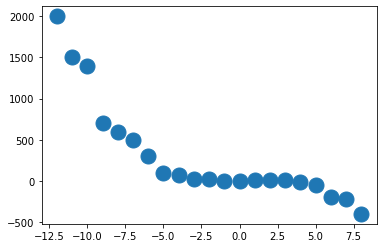

In [14]:
plt.plot()
plt.plot(x_values, y_values, 'o', markersize=15)
plt.show()

Now, `polyfit` will fit a n-degree polynomial (i.e. 3$^{rd}$ degree) to the provided x- and y-data.

What `polyfit` returns are the coefficients.

Recall from above: four coefficients are needed to define a 3$^{rd}$ degree polynomial

[M, N, O, P] --> $Mx^3 + Nx^2 + Ox + P$

In [65]:
coefficients = np.polyfit(x_values, y_values, 3)
coefficients

array([-1.04595921,  1.69627957,  3.41269291,  2.79322153])

Therefore, we have the following polynomial (rounded coefficients):

$-1.0*x^3 + 1.7*x^2 + 3.4*x + 2.8$

Now we can use Numpy's `poly1d` to encode this polynomial exactly (even if the print statement below doesn't show it):

In [34]:
cubic_polynomial = np.poly1d(coefficients)
print(cubic_polynomial)

        3         2
-1.046 x + 1.696 x + 3.413 x + 2.793


Using this cubic polynomial, we can generate "ideal" y-data given a range of x-data values.

In [66]:
y_ideal_cubic = cubic_polynomial(x_values)

Plot both the original data and the data from the fitted cubic polynomial:

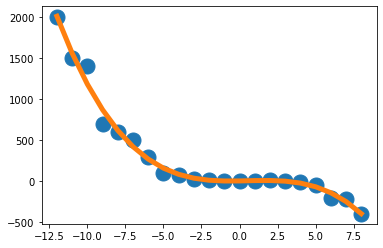

In [67]:
plt.plot()
plt.plot(x_values, y_values, 'o', markersize=15)
plt.plot(x_values, y_ideal_cubic, linewidth=5)
plt.show()